In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 코스피 데이터 불러오기
df_kospi = pd.read_csv('new_data/코스피지수(1981.5월부터).csv')

In [3]:
# 불러온 데이터 범위 정하기 (2004년 1월 1일부터 2026년 2월 1일까지)
df_kospi['날짜'] = pd.to_datetime(df_kospi['날짜'])
df_kospi = df_kospi[(df_kospi['날짜'] >= '2004-01-01') & (df_kospi['날짜'] <= '2026-02-01')]

In [4]:
# 날짜 정렬 (과거 -> 현재)
df_kospi = df_kospi.sort_values(by='날짜')

# 날짜를 인덱스로 설정
df_kospi.set_index('날짜', inplace=True)

In [5]:
# 종가 컬럼의 쉼표 제거 및 숫자 변환
df_kospi['종가'] = df_kospi['종가'].astype(str).str.replace(',', '').astype(float)

In [6]:
# 결측지 확인 및 제거
df_kospi['종가'] = df_kospi['종가'].ffill()

In [7]:
# 12개월 누적 로그 수익률 계산
# 공식: ln(현재 종가) - ln(12개월 전 종가)
df_kospi['log_price'] = np.log(df_kospi['종가'])
df_kospi['12m_log_return'] = df_kospi['log_price'].diff(12)

In [8]:
# Z-Score 계산
# 전체 기간의 평균과 표준편차 사용
mean_return = df_kospi['12m_log_return'].mean()
std_return = df_kospi['12m_log_return'].std()

df_kospi['z_score'] = (df_kospi['12m_log_return'] - mean_return) / std_return

In [9]:
# 결과 확인
print(df_kospi[['종가', '12m_log_return', 'z_score']].tail())

                 종가  12m_log_return   z_score
날짜                                           
2025-10-01  4107.50        0.474312  1.990310
2025-11-01  3926.59        0.469274  1.965640
2025-12-01  4214.17        0.563196  2.425523
2026-01-01  5224.36        0.730118  3.242838
2026-02-01  5354.49        0.748618  3.333423


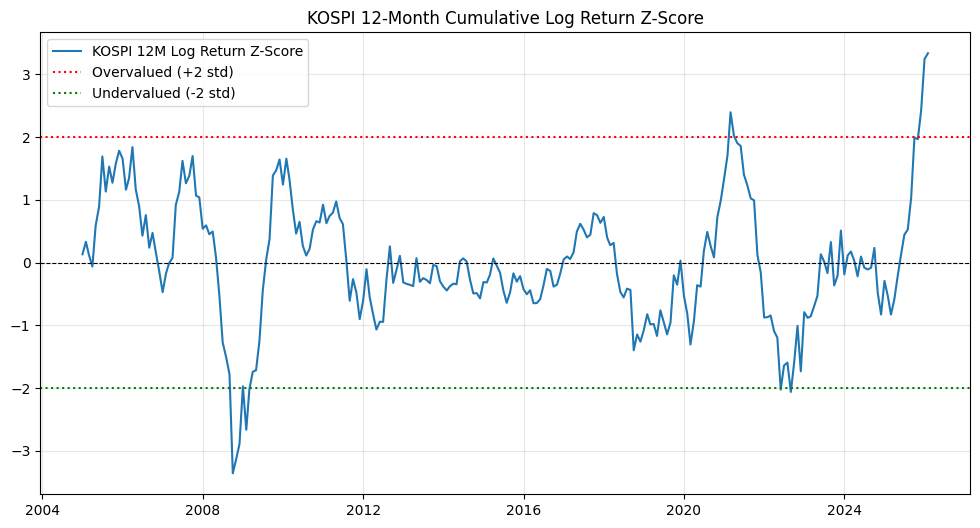

In [10]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_kospi.index, df_kospi['z_score'], label='KOSPI 12M Log Return Z-Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(2, color='red', linestyle=':', label='Overvalued (+2 std)')
plt.axhline(-2, color='green', linestyle=':', label='Undervalued (-2 std)')
plt.title('KOSPI 12-Month Cumulative Log Return Z-Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# CSV 파일 저장
output_filename = 'new_data/new_data_z_score/new_kospi_z_score.csv'
df_kospi.to_csv(output_filename, encoding='utf-8-sig') # 한글 깨짐 방지를 위해 utf-8-sig 사용
print(f"'{output_filename}' 파일이 저장되었습니다.")

'new_data/new_data_z_score/new_kospi_z_score.csv' 파일이 저장되었습니다.
